<a href="https://colab.research.google.com/github/soumabkargit/tensorflow_keras_projects/blob/master/tensorflow_keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
#Load the Data
df = pd.read_csv('data/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [0]:
#Data PreProcessing
len(df)
df.isnull().sum()
df = df.dropna()

In [0]:
# Convert Pandas to Numpy for Keras
# Features
X = df[['feature1','feature2']].values
# Label
y = df['price'].values

In [23]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(300,)

In [0]:
#Normalizing/Scaling the Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#Creating a Model
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [26]:
#Training
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
22/22 [==============================] - 0s 3ms/step - loss: 51513.4609 - val_loss: 11582.0469
Epoch 2/600
22/22 [==============================] - 0s 3ms/step - loss: 47248.5156 - val_loss: 11661.1465
Epoch 3/600
22/22 [==============================] - 0s 3ms/step - loss: 47171.2188 - val_loss: 11511.1143
Epoch 4/600
22/22 [==============================] - 0s 3ms/step - loss: 46671.4648 - val_loss: 12649.0654
Epoch 5/600
22/22 [==============================] - 0s 9ms/step - loss: 46545.7969 - val_loss: 12336.8135
Epoch 6/600
22/22 [==============================] - 0s 3ms/step - loss: 50640.9102 - val_loss: 12524.4482
Epoch 7/600
22/22 [==============================] - 0s 3ms/step - loss: 48745.4336 - val_loss: 11908.0938
Epoch 8/600
22/22 [==============================] - 0s 3ms/step - loss: 48076.5391 - val_loss: 12433.4082
Epoch 9/600
22/22 [==============================] - 0s 3ms/step - loss: 51947.6680 - val_loss: 11838.5801
Epoch 10/600
22/22 [=================

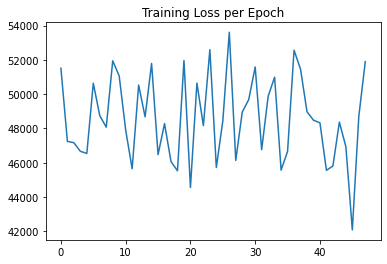

In [27]:
#Evaluation
model.history.history
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [0]:
#Compare final evaluation (MSE) on training set and test set.
model.metrics_names
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)
training_score
test_score
test_predictions = model.predict(X_test)
test_predictions
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']
pred_df
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

In [28]:
# Essentially the same thing, difference just due to precision
test_score

11582.337890625

In [29]:
#RMSE
test_score**0.5

107.62127062353892

In [30]:
#Predicting on brand new data
# [[Feature1, Feature2]]
new_gem = [[998,1000]]
# Don't forget to scale!
scaler.transform(new_gem)
new_gem = scaler.transform(new_gem)
model.predict(new_gem)
model.save('model/model_tf_keras_reg.h5')  # creates a HDF5 file 'my_model.h5'
later_model = load_model('model/model_tf_keras_reg.h5')
later_model.predict(new_gem)

array([[417624.22]], dtype=float32)